# Microsoft's New Movie Studio

Authors: Bradly Horn and George Ferre


## Overview
This project uses data from Rotten Tomatoes, TheMovieDB, and The Numbers and analyazes it to come up with three suggestions for helping the head microsoft's new movie studio department. It will aim to answer the following: What genre of films are most profitable basic off the ratio of averge production budget to worldwide gross. It will show team recommendations for writers and directors.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. Giving recommendations to the head of Microsoft's new movie studio and help decide what type of films to create that will be most profitable.

### Three Recommendations
1. Types of genres to make basic off averge worldwide gross. 
2. Writers are the ideal to create a great story line that all will want to see.
3. The best possiable directors to lead the moive to be a smach hit.

## Data Understanding¶
Will we be using data from three different place.
1. Rotten Tomatoes, one the world’s most trusted recommendation resources for quality entertainment.
2. The Movie Database (TMDb), which is a massive community built movie and TV database.
3. The Numbers, the largest freely available database of movie industry information on the web.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load are files as dataframes
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
rt_movie_details_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')

In [3]:
tn_movie_budgets_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [4]:
tmdb_movies_df.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [5]:
rt_movie_details_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [6]:
rt_reviews_df.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


## Data Preparation


We are planning on using `tn_movie_budgets_df` for are genre ratio of averge production budget to averge worldwide gross, but we will need the to add in the moive genre from the `tmdb_movies_df`. For the writer and directors recommondation we need to figure out if we want to use box office gross or movie rating from are `rt_movie_details_df` and `rt_reviews_df` dataframes.

### Data Cleaning

#### Cleaning The Movie Database (TMDb) Dataframe

First we need to get the `tmdb_movies_df['genre_ids']` change into the names of genres and not ids.

In [7]:
tmdb_movies_df.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [8]:
type(tmdb_movies_df['genre_ids'][0])

str

Are `tmdb_movies_df['genre_ids']` values we need them to be intergers and not string values.

In [9]:
#clean punctuation from row values
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].str.replace('[^\w\s]','')

#change value in list of values
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].str.split(' ')

We want the Genre IDs put they are coded so we need to know what these codes stand for. Looking at forums from themoviedb.org we can find the genre id names and use this info to make a list of tuples for the genre ids called tmdb_genre_ids.

In [10]:
#data from 'https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee'
tmdb_genre_ids = [('Action', '28'), ('Adventure', '12'), ('Animation', '16'), ('Comedy', '35'),
('Crime', '80'), ('Documentary', '99'), ('Drama', '18'), ('Family', '10751'),
('Fantasy', '14'), ('History', '36'), ('Horror', '27'), ('Music', '10402'),
('Mystery', '9648'), ('Romance', '10749'), ('Science Fiction', '878'),
('TV Movie', '10770'), ('Thriller', '53'), ('War', '10752'), ('Western', '37')]

Next we make a function called id_rename that passes the parameter id_value. This function is going to return the the names of a movie's genre.

In [11]:
def id_rename(id_value):
    new_id_name = []
    for id_num in id_value:
        for id_pair in tmdb_genre_ids:
            if id_num == id_pair[1]:
                new_id_name.append(id_pair[0])
    return new_id_name

Now are make a variable called new_id_list that is an empty list. Using a for loop we loop through each value in tmdb_movies['genre_ids'] with are function and append what retruned to our empty list. After are new list is made we will make a new column called 'genre2' and have it = are list.

In [12]:
new_id_list = []

for ids in tmdb_movies_df['genre_ids']:
    new_id_list.append(id_rename(ids))
    
tmdb_movies_df['genre_ids'] = new_id_list

In [13]:
tmdb_movies_df.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


Now that we have the genre names as a list for strings for each movie, we are join to turn them into just a one string.

In [14]:
tmdb_movies_df['genre_ids'] = tmdb_movies_df.genre_ids.apply(', '.join)

In [15]:
tmdb_movies_df.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"Adventure, Fantasy, Family",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"Fantasy, Adventure, Animation, Family",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"Adventure, Action, Science Fiction",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


#### Cleaning The Numbers Dataframe

In [16]:
tn_movie_budgets_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


Looks like some of the value our columns need some fixing plus we have a few $0 values that we will need to drop.

First we change the str values for `production_budget`, `domestic_gross`, and `worldwide_gross` into floats by replacing the punctuation with `''`.

In [17]:
#changing the str in to int
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('[\$,]', '').astype('float')

Then we droping any of the value that are `==` to `0`.

In [18]:
#droping the 0 values
drop_domestic_gross = tn_movie_budgets_df.index[tn_movie_budgets_df['domestic_gross'] == 0].tolist()
drop_worldwide_gross = tn_movie_budgets_df.index[tn_movie_budgets_df['worldwide_gross'] == 0].tolist()
drop_both = drop_domestic_gross + drop_worldwide_gross
tn_movie_budgets_df = tn_movie_budgets_df.drop(tn_movie_budgets_df.index[drop_both])

In [19]:
tn_movie_budgets_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


#### Merged: The Movies DB Data with The Numbers Data

Now that we have a two dataframes cleaned up and we have for values that we can work with. We are going to merge the two dataframes together so the the movies will have both genres, budgets, and gross values in one dataframe.

In [20]:
tmdb_tn_df = pd.merge(tn_movie_budgets_df, tmdb_movies_df, left_on = 'movie', right_on = 'original_title')

In [21]:
tmdb_tn_df.head(3)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,"Action, Adventure, Fantasy, Science Fiction",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2470,"Adventure, Action, Fantasy",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,14169,"Action, Adventure, Science Fiction",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457


So it seems like each movie has a genre combo like value. We want the top single genres so let break them down and get just the top 10 single gernes. We are just making a new dataframe to work on here.

In [22]:
tmdb_tn_df_single = tmdb_tn_df

Now we are going to `split` the `genre_ids` column and `explode` them into different rows so that we can get the mean for each single gerne.

In [23]:
tmdb_tn_df_single['genre_ids'] = tmdb_tn_df_single['genre_ids'].str.split(',')
tmdb_tn_df_single = tmdb_tn_df_single.explode('genre_ids')
tmdb_tn_df_single['genre_ids'] = tmdb_tn_df_single['genre_ids'].str.strip()

In [24]:
tmdb_tn_df_single.head(3)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,Action,19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,Adventure,19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,6,Fantasy,19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676


Alright now that we have the genres split up into diffent rows we can now get the mean of each gerne and plot them into a bar chart for are results.

We also need to prepare our Rotten Tomatoes data to find the best writers and directors for the genres that we will choose. We are interested in trying to create movies that will both do well commercially and receive good critical acclaim.

By default, box office numbers are shown as an object. We need to change these values to floats so that they can correctly be sorted by highest to lowest amounts.

In [25]:
#Need to remove commas from box office numbers, otherwise they cannot be converted to float
rt_movie_details_df['box_office'] = rt_movie_details_df['box_office'].str.replace(',','')
rt_movie_details_df['box_office'] = rt_movie_details_df['box_office'].astype('float')

By default, genres are shown as a string. This is not an issue for movies that fit into a single genre, but when there are multiple genres, it is difficult to categorize movies.

A new column is created that lists all of the individual genres listed in the genre column.

In [26]:
rt_movie_details_df['genre_list'] = rt_movie_details_df['genre'].str.split('|')
rt_movie_details_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,"[Action and Adventure, Classics, Drama]"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]"
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"[Drama, Musical and Performing Arts]"


So far, our dataframe gives us information about box office, but does not give information about quality of the films. We can review our other table for review information.

In [27]:
rt_reviews_df.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


The review dataframe has two columns that give information on quality: rating and fresh. The rating column could give us good numeric values, but the system is inconsistent and has missing values. The fresh column is consistent, but we need to convert to a number. There are two possibilities: fresh and rotten. We can assign fresh to 1 and rotten to 0, and get a mean of the scores to get the "freshness" of the movie. Moving forward from there, we can assign a "quality ratio" by  multiplying box office and freshness. This will give us a number to rank films that takes both quality and earnings into account. 

In [28]:
rt_reviews_df.replace(to_replace='fresh', value=1, inplace=True)
rt_reviews_df.replace(to_replace='rotten', value=0, inplace=True)

In [29]:
rt_freshness = rt_reviews_df.groupby('id').mean()
rt_freshness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 3 to 2000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fresh       1135 non-null   float64
 1   top_critic  1135 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


Now that the review table is cleaned up, we can merge it with our main table so that box office and ratings can be compared.

In [30]:
movie_details_rated_df = rt_movie_details_df.merge(rt_freshness, how='left', left_on='id', right_on='id')
movie_details_rated_df.dropna(subset=['fresh', 'writer', 'director', 'genre_list'], inplace=True)

There are instances where there are multiple directors and/or writers attached to a movie. They appear to be based on top billing. In these cases we want to choose the writer or directer billed last so that we can avoid suggesting "household names".

In [31]:
movie_details_rated_df['chosen_dir'] = rt_movie_details_df['director'].str.split('|').str[-1]
movie_details_rated_df['chosen_writ'] = rt_movie_details_df['writer'].str.split('|').str[-1]
movie_details_rated_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list,fresh,top_critic,chosen_dir,chosen_writ
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",0.631902,0.208589,David Cronenberg,Don DeLillo
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"[Drama, Musical and Performing Arts]",0.782609,0.217391,Allison Anders,Allison Anders


Using freshness, we can look at how box office earnings and critical acclaim interact.

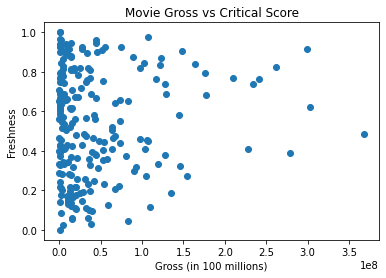

In [32]:
fig, ax = plt.subplots()

x = movie_details_rated_df['box_office'].values
y = movie_details_rated_df['fresh'].values

ax.scatter(x,y)
ax.set_title("Movie Gross vs Critical Score")
ax.set_xlabel("Gross (in 100 millions)")
ax.set_ylabel("Freshness");

Unfortunately, there does not appear to be a strong correlation between the two. However, we can still take both into account using a new number that we will call the quality ratio. The quality ratio will be calculated by multiplying the box office numbers with our freshness ratio.

In [33]:
movie_details_rated_df['quality_ratio'] = movie_details_rated_df['box_office'] * movie_details_rated_df['fresh']
movie_details_rated_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list,fresh,top_critic,chosen_dir,chosen_writ,quality_ratio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",0.631902,0.208589,David Cronenberg,Don DeLillo,379141.104294
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"[Drama, Musical and Performing Arts]",0.782609,0.217391,Allison Anders,Allison Anders,NaN


Our recommendations for writers and directors hinges on the quality ratio, so we need to drop any movies that do not have one available.

In [34]:
movie_details_rated_df.dropna(subset=['quality_ratio'], inplace=True)
movie_details_rated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 1 to 1542
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             233 non-null    int64  
 1   synopsis       233 non-null    object 
 2   rating         233 non-null    object 
 3   genre          233 non-null    object 
 4   director       233 non-null    object 
 5   writer         233 non-null    object 
 6   theater_date   232 non-null    object 
 7   dvd_date       232 non-null    object 
 8   currency       233 non-null    object 
 9   box_office     233 non-null    float64
 10  runtime        231 non-null    object 
 11  studio         210 non-null    object 
 12  genre_list     233 non-null    object 
 13  fresh          233 non-null    float64
 14  top_critic     233 non-null    float64
 15  chosen_dir     233 non-null    object 
 16  chosen_writ    233 non-null    object 
 17  quality_ratio  233 non-null    float64
dtypes: float6

Finally, we will create functions to look at movies within a given genre, group the writers or directors together, and sort mean quality ratio from highest to lowest.

In [35]:
def writer_genre_dataframe_both(genre):
    df = movie_details_rated_df[movie_details_rated_df.apply(lambda x: genre in x['genre_list'], axis=1)]
    genre_df = df.groupby('chosen_writ').mean().sort_values(by='quality_ratio', ascending=False)
    return genre_df

In [36]:
def director_genre_dataframe_both(genre):
    df = movie_details_rated_df[movie_details_rated_df.apply(lambda x: genre in x['genre_list'], axis=1)]
    genre_df = df.groupby('chosen_dir').mean().sort_values(by='quality_ratio', ascending=False)
    return genre_df

## Results

### Top Ten Genres by Worldwide Gross

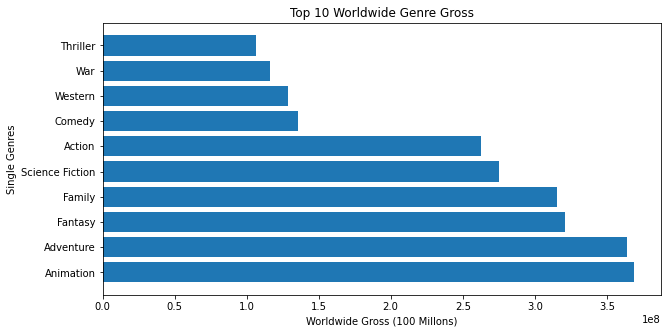

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
x = list(tmdb_tn_df_single.groupby(['genre_ids']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).keys())
y = list(tmdb_tn_df_single.groupby(['genre_ids']).mean()['worldwide_gross'].sort_values(ascending=False).head(10).values)

ax.barh(x,y);
ax.set_title('Top 10 Worldwide Genre Gross')
ax.set_xlabel('Worldwide Gross (100 Millons)')
ax.set_ylabel('Single Genres');

So base of an averge of worldwide gross for each genre, it looks like are top three genres are animation, adventure, and fantasy just beating over family. Using this information, we can pull the top 5 writers and directors in each genre. For our purposes here, we will look at the top 3: Animation, Adventure, and Fantasy

In [38]:
top_writ_ani = writer_genre_dataframe_both('Animation')[0:5]
top_writ_aa = writer_genre_dataframe_both('Action and Adventure')[0:5]
top_writ_sf = writer_genre_dataframe_both('Science Fiction and Fantasy')[0:5]

<ipython-input-39-168e94a8238a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-168e94a8238a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-168e94a8238a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');


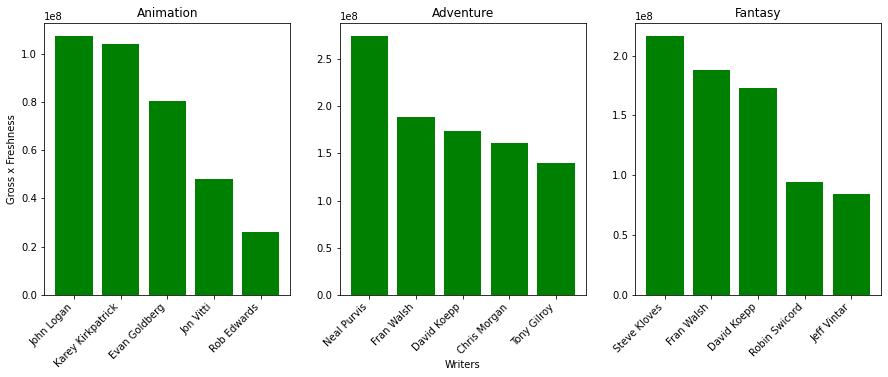

In [39]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize = (15,5))

x1 = top_writ_ani.index
height1 = top_writ_ani['quality_ratio'].values

ax1.bar(x=x1, height=height1, color='green')
ax1.set_title("Animation")
plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Gross x Freshness")

x2 = top_writ_aa.index
height2 = top_writ_aa['quality_ratio'].values

ax2.bar(x=x2, height=height2, color='green')
ax2.set_title("Adventure")
ax2.set_xlabel("Writers")
plt.draw()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

x3 = top_writ_sf.index
height3 = top_writ_sf['quality_ratio'].values

ax3.bar(x=x3, height=height3, color='green')
ax3.set_title("Fantasy")
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');

In [40]:
top_dir_ani = director_genre_dataframe_both('Animation')[0:5]
top_dir_aa = director_genre_dataframe_both('Action and Adventure')[0:5]
top_dir_sf = director_genre_dataframe_both('Science Fiction and Fantasy')[0:5]

<ipython-input-41-b7d8fece4c90>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-41-b7d8fece4c90>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
<ipython-input-41-b7d8fece4c90>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');


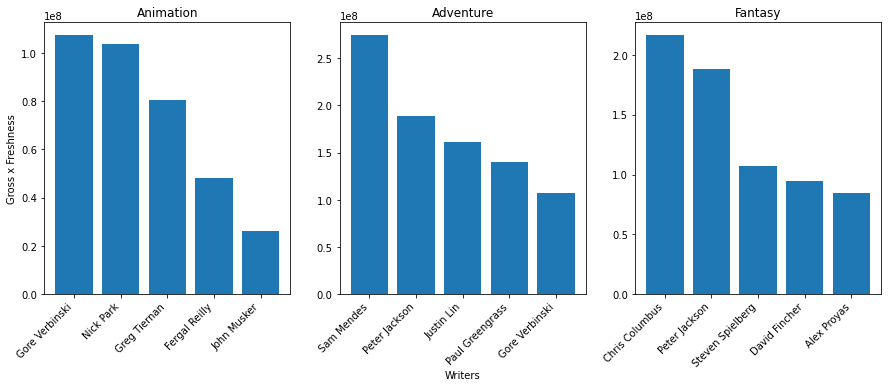

In [41]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize = (15,5))

x1 = top_dir_ani.index
height1 = top_dir_ani['quality_ratio'].values

ax1.bar(x=x1, height=height1)
ax1.set_title("Animation")
plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Gross x Freshness")

x2 = top_dir_aa.index
height2 = top_dir_aa['quality_ratio'].values

ax2.bar(x=x2, height=height2)
ax2.set_title("Adventure")
ax2.set_xlabel("Writers")
plt.draw()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

x3 = top_dir_sf.index
height3 = top_dir_sf['quality_ratio'].values

ax3.bar(x=x3, height=height3)
ax3.set_title("Fantasy")
plt.draw()
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right');

## Conclusions

So are analysis leads to the following findings:

#### 1. Types of genres to make basic off averge worldwide gross. 
Looking at are chart for worldwide gross, animation, adventure, and fantasy gross the highest.

#### 2. Writers are the ideal to create a great story line that all will want to see.
We would like to reach out to the following writers:
1. Animation: John Logan
2. Adventure: Neal Purvis
3. Fantasy: Steve Kloves

#### 3. The best possiable directors to lead the moive to be a smach hit.
We would like to reach out to the following directors:
1. Animation: Gore Verbinski
2. Adventure: Sam Mendes
3. Fantasy: Chris Columbus
